In [ ]:
[문제1] login.html 웹 문서를 대상으로 다음 조건에 맞게 내용을 추출하시오.

<처리 조건>
1. <tr> 태그의 하위 태그인 <th> 태그의 모든 내용 출력.
2. 각 단계 처리

<출력 결과>
th 태그 내용
아이디
비밀번호

In [5]:
import os
from bs4 import BeautifulSoup
os.getcwd()
file_path = open('C:/Users/user/Downloads/step06_word_count/data/login.html', mode = 'r', encoding='utf-8')
source = file_path.read()

soup = BeautifulSoup(source, 'html.parser')
print('soup 내용', soup)

trs = soup.find_all('tr')
print(f'i trs : {trs}')

print('\n tag 내용')
for tr in trs :
    th = tr.find('th')
    print(th.string)

soup 내용 <!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<title>회원 로그인</title>
<!-- 외부 스타일 시트 파일 링크 -->
<link href="../css/login.css" rel="stylesheet"/>
<!-- jQuery 라이브러리 링크 -->
<script src="../js/jquery.js"></script>
<!-- javascript 외부 파일 링크 -->
<script src="../js/login.js"></script>
</head>
<body>
<div id="login_wrap">
<h2 class="login_title"> 회원 로그인 </h2>
<form action="http://www.naver.com" method="post" name="frm" onsubmit="return login_check()">
<table id="login_t">
<tr> <!-- 1행 -->
<th> 아이디 </th>
<td> <input class="input_box" id="id" name="id" size="14" type="text"/>
</td>
</tr>
<tr> <!-- 2행 -->
<th> 비밀번호 </th>
<td> <input class="input_box" id="pwd" name="pwd" size="14" type="password"/>
</td>
</tr>
</table>
<div id="login_btn">
<input class="login_b" type="submit" value="로그인"/>
<input class="login_b" onclick="$('#id').focus()" type="reset" value="취소"/>
</div>
</form>
</div>
</body>
</html>

i trs : [<tr> <!-- 1행 -->
<th> 아이디 </th>
<td> <input class="input_box" id="id" name

In [ ]:
[문제2] login.html 웹 문서를 대상으로 다음 조건에 맞게 내용을 추출하시오.

<처리 조건>
id = “login_wrap” 선택자의 하위 태그 전체 출력
id = “login_wrap” 선택자 > form > table 태그 내용 출력
find_all(‘tr’) 함수 이용 th 태그 내용 출력

In [7]:
file_path = open('C:/Users/user/Downloads/step06_word_count/data/login.html', mode = 'r', encoding='utf-8')
source = file_path.read()

soup = BeautifulSoup(source, 'html.parser')
print('soup 내용', soup)

# 1) id 선택자 : <div id="login wrap"
print('1.id 선택자')
div = soup.select_one("div#login_wrap")
print(div)
print()      

# 2) id 선택자 : <div id="login wrap"
print('2.id 선택자 > from > table') 
table = soup.select_one("div#login_wrap > from > table") #계충적으로 접근 : 열 제목
print(table)
print()    

# 3) table > tr > th/td 태그 내용 출력
print('3) table > tr > th/td 태그 내용 출력') 
trs = soup.find_all("tr")
print(trs)
print()      
print('nth 내용')
for tr in trs :
    th = tr.find('th')
    print(th.string)

# [추가] 요소 안에 요소 추출
print('\nth input 테그 내용')
for tr in trs :
    tds = tr.find('td') # 요소 추출
    inp = tds.find('input') # 요소 > 요소 추출
    print(inp)

# 4) find_all() 이용 input 태그 valuse 속성값 출력
inputs = soup.find_all('input')
print(inputs)

print('\ninput 태그의 value 속성 값')
for inp in inputs : #input 태그 속성과 내용 가져오기
    if 'value' in inputs :
        value = inp.attrs['value'] #href 속성 가져오기
        print(value)

soup 내용 <!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<title>회원 로그인</title>
<!-- 외부 스타일 시트 파일 링크 -->
<link href="../css/login.css" rel="stylesheet"/>
<!-- jQuery 라이브러리 링크 -->
<script src="../js/jquery.js"></script>
<!-- javascript 외부 파일 링크 -->
<script src="../js/login.js"></script>
</head>
<body>
<div id="login_wrap">
<h2 class="login_title"> 회원 로그인 </h2>
<form action="http://www.naver.com" method="post" name="frm" onsubmit="return login_check()">
<table id="login_t">
<tr> <!-- 1행 -->
<th> 아이디 </th>
<td> <input class="input_box" id="id" name="id" size="14" type="text"/>
</td>
</tr>
<tr> <!-- 2행 -->
<th> 비밀번호 </th>
<td> <input class="input_box" id="pwd" name="pwd" size="14" type="password"/>
</td>
</tr>
</table>
<div id="login_btn">
<input class="login_b" type="submit" value="로그인"/>
<input class="login_b" onclick="$('#id').focus()" type="reset" value="취소"/>
</div>
</form>
</div>
</body>
</html>

1.id 선택자
<div id="login_wrap">
<h2 class="login_title"> 회원 로그인 </h2>
<form action="

In [ ]:
[문제3] iris.csv 파일을 이용하여 다음과 같이 차트를 그리시오.

<처리 조건>
iris.csv 파일을 iris 변수명으로 가져온후 파일 정보 보기
1번 칼럼과 3번 칼럼을 대상으로 산점도 그래프 그리기
1번 칼럼과 3번 칼럼을 대상으로 산점도 그래프 그린후 5번 칼럼으로 색상 적용

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
iris = pd.read_csv('C:/Users/user/Downloads/step06_word_count/data/iris.csv', encoding='utf-8')
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


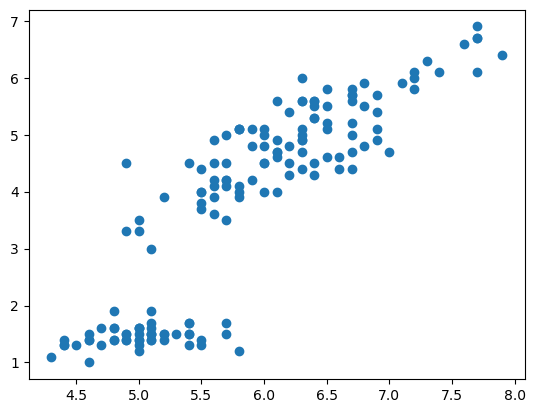

In [15]:
plt.scatter(iris['Sepal.Length'], iris['Petal.Length'])

In [17]:
print(iris['Species'].unique())

['setosa' 'versicolor' 'virginica']


Text(0.5, 1.0, 'Sepal vs Petal Scatter Plot')

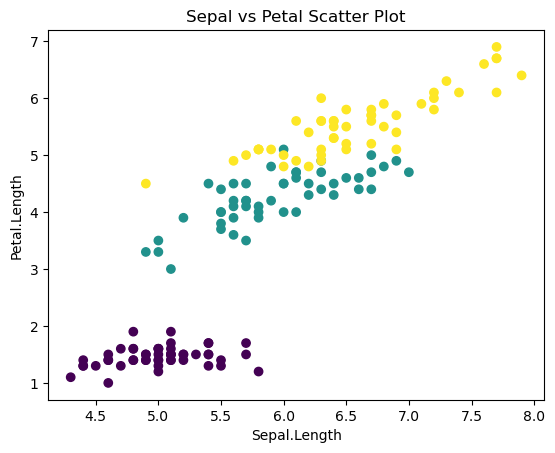

In [19]:
species = []
for i in iris['Species'] :
    if i == 'setosa' :
        species.append(1)
    elif i == 'versicolor' :
        species.append(2)
    else :
        species.append(3)

plt.scatter(iris['Sepal.Length'], iris['Petal.Length'], c=species)
plt.xlabel('Sepal.Length')
plt.ylabel('Petal.Length')
plt.title('Sepal vs Petal Scatter Plot')